In [1]:
import numpy as np

import matplotlib.pyplot as plt

m = 30
theta0_true = 2
theta1_true = 0.5
X = np.linspace(-1,1,m)

rand_noise_mu = 0
rand_noise_std = 0.1

rand_noise = np.random.normal(rand_noise_mu, rand_noise_std, m)
Y = theta0_true + theta1_true * X + rand_noise

In [2]:
from sklearn import linear_model
X = np.reshape(X, (-1, 1))

regr = linear_model.LinearRegression()
regr.fit(X, Y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [3]:
theta0 = regr.intercept_
theta1 = regr.coef_
print('theta1: \n', theta0)
print('theta0: \n', theta1)

theta1: 
 2.0242071280163114
theta0: 
 [0.51788977]


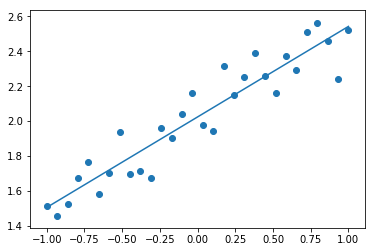

In [4]:
plt.scatter(X, Y)
plt.plot(X, theta0 + theta1*X)
plt.show()

#  Linear Regression for Boston House Price Prediction
(based on example: https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155)

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  # pandas is a useful data analysis toolbox
import seaborn as sns  # seaborn is a good data visualisation toolbox, which can be found at https://seaborn.pydata.org/

%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

# boston_dataset is a dictionary
# let's check what it contains
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [18]:
print(boston_dataset.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [20]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()
#boston.tail()
#boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
boston['MEDV'] = boston_dataset.target

In [22]:
# check for missing values in all the columns
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

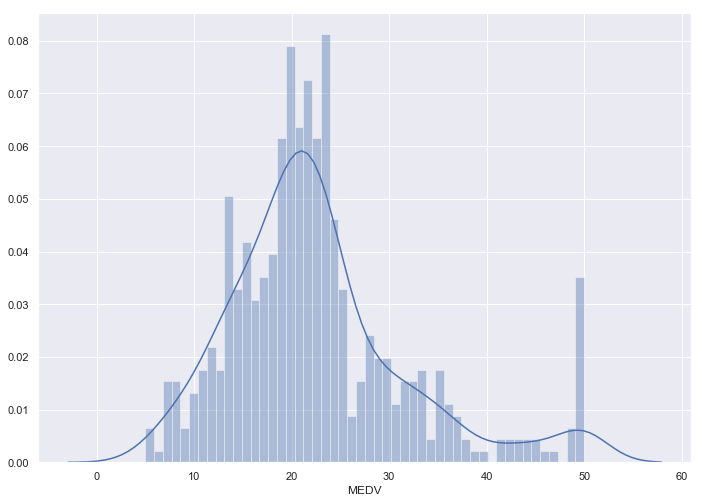

In [26]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
sns.distplot(boston['MEDV'], bins=50)
plt.show()

In [27]:

# compute the pair wise correlation for all columns  
correlation_matrix = boston.corr().round(2)

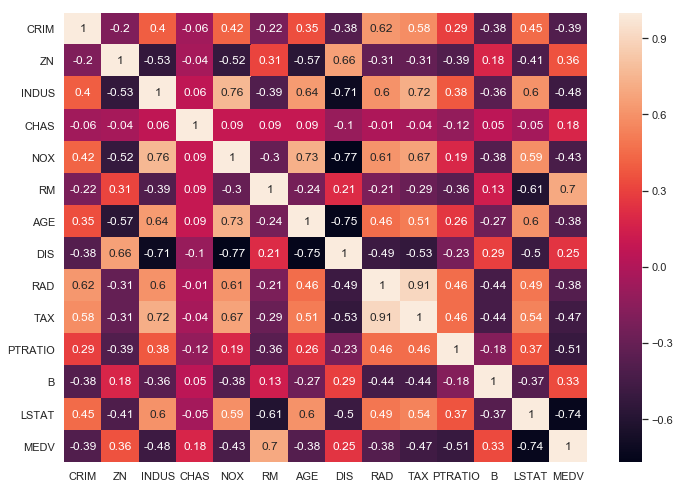

In [28]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

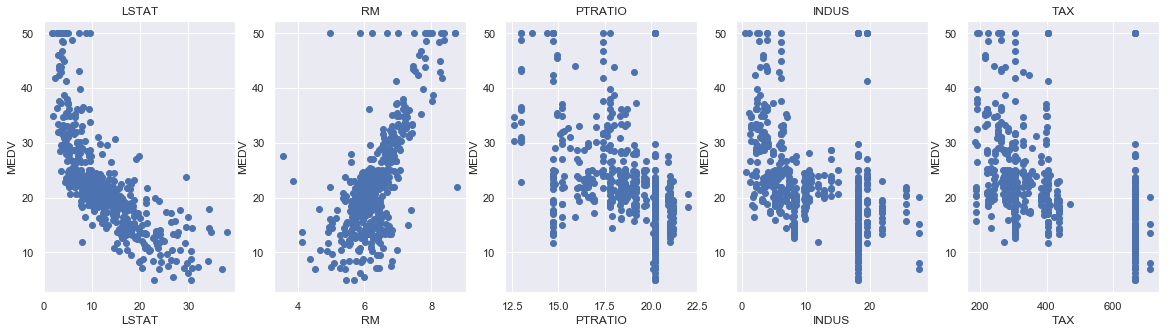

In [35]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [59]:
#X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])

X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'], boston['PTRATIO'], boston['INDUS'], boston['TAX']
                      ], columns = ['LSTAT','RM','PTRATIO', 'INDUS', 'TAX'])
Y = boston['MEDV']


In [60]:

from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 5)
(102, 5)
(404,)
(102,)


In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
np.mean(X_train, axis=0)

array([-7.07629774e-16, -7.21919774e-16,  2.06567436e-14,  2.35455220e-15,
        4.96027861e-17])

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
mse = (mean_squared_error(Y_train, y_train_predict))


print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)

mse = (mean_squared_error(Y_test, y_test_predict))



print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))


The model performance for training set
--------------------------------------
MSE is 28.07202600757083


The model performance for testing set
--------------------------------------
MSE is 23.84960738031438


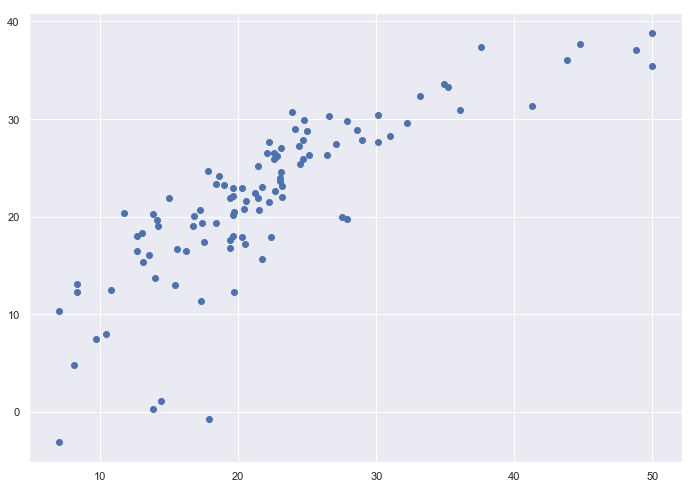

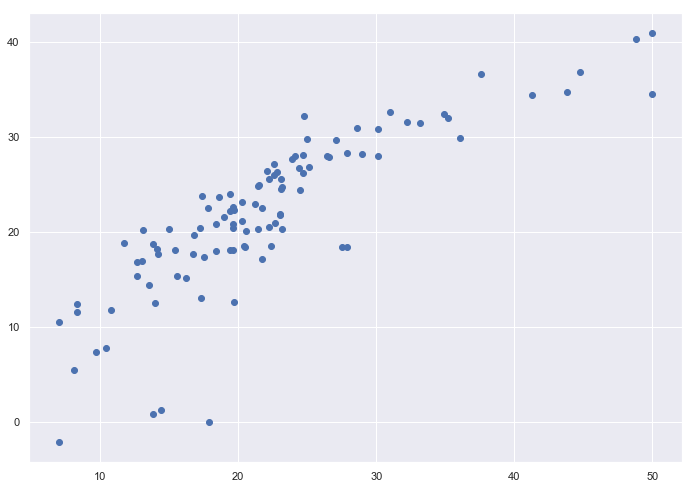

In [40]:

# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict)
plt.show()